In [1]:
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random
import geopandas as gpd
from scipy.spatial import Delaunay
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch
from scipy.interpolate import griddata
from matplotlib.pyplot import figure

In [2]:


genera = {"snapper": "LUTJANU", 
              "shrimp": "PENAEUS", 
              "menhaden": "BREVOOR", 
              "seatrout": "CYNOSCI", 
              "drum": "SCIAENO", 
              "croaker": "MICROPO",
              "grouper" : "MYCTERO",
              "mackerel" : "SCOMBER",
              "anchovy" : "ANCHOA",
        'STENOTO_CAPRIN': 'STENOTO',
        'CHLOROS_CHRYSU': 'CHLOROS',
        'TRACHYP_SIMILI': 'TRACHYP',
        'PEPRILU_ALEPID': 'PEPRILU',
        'CALLINE_SAPIDU': 'CALLINE',
        'PRIONOT_LONGIS': 'PRIONOT',
        'LOLIGO_PLEII': 'LOLIGO',
        'PORTUNU_SPINIM': 'PORTUNU',
        'SICYONI_BREVIR': 'SICYONI',
        'TRACHUR_LATHAM': 'TRACHUR',
        'LEIOSTO_XANTHU': 'LEIOSTO',
        'SQUILLA_EMPUSA': 'SQUILLA',
        'LAGODON_RHOMBO': 'LAGODON',
        'SYACIUM_GUNTER': 'SYACIUM',
        'SERRANU_ATROBR': 'SERRANU',
        'TRICHIU_LEPTUR': 'TRICHIU',
        'ZOOBOTR_VERTIC': 'ZOOBOTR',
        'AMUSIUM_PAPYRA': 'AMUSIUM',
        'ETRUMEU_TERES': 'ETRUMEU',
        'SYNODUS_FOETEN': 'SYNODUS',
        'CENTROP_PHILAD': 'CENTROP',
        'UPENEUS_PARVUS': 'UPENEUS',
        'LOLLIGU_BREVIS': 'LOLLIGU',
        'ARIUS_FELIS': 'ARIUS',
        'SAURIDA_BRASIL': 'SAURIDA',
}


#gens = ['LUTJANU', 'PENAEUS', 'BREVOOR', 'CYNOSCI', 'SCIAENO', 'MICROPO', 'MYCTERO', 'SCOMBER', 'ANCHOA']



In [3]:
"""
# aggregated with random sampling
Zlist = []

#df_raw = pd.read_csv("D:\public_seamap_csvs\\" + gen + "_CPUE.csv")

df = pd.read_csv("D:\public_seamap_csvs\\" + gen + "_CPUE.csv")
df["lat_round"] = [round(i,1) for i in df['Lat'].tolist()]
df["lon_round"] = [round(i,1) for i in df['Lon'].tolist()]
# use pandas groupby to spatially average by lat and lon
df_raw = df.groupby(['lat_round', 'lon_round']).mean().reset_index()

for i in range(1000):


    rows = random.sample(range(df_raw.shape[0]), 2000)

    df = df_raw.iloc[rows, :]
    #df = df.iloc[:100, :] #shrink this to not run out of RAM

    Xi = (-df['Lon']).tolist()
    Yi = df['Lat'].tolist()
    Zi = df['CPUE_MTSQKM'].tolist()
    
    
    Pi = np.array([Xi, Yi]).transpose()
    tri = Delaunay(Pi)

    N = 100
    x = np.linspace(min(Xi), max(Xi), N)
    y = np.linspace(min(Yi), max(Yi), N)
    X, Y = np.meshgrid(x, y)
    P = np.array([X.flatten(), Y.flatten() ]).transpose()
    
    Z_nearest = griddata(Pi, Zi, P, method = "nearest").reshape([N, N])
    
    Zlist.append(Z_nearest)
    
Znearest = sum(Zlist) / len(Zlist)
"""



'\n# aggregated with random sampling\nZlist = []\n\n#df_raw = pd.read_csv("D:\\public_seamap_csvs\\" + gen + "_CPUE.csv")\n\ndf = pd.read_csv("D:\\public_seamap_csvs\\" + gen + "_CPUE.csv")\ndf["lat_round"] = [round(i,1) for i in df[\'Lat\'].tolist()]\ndf["lon_round"] = [round(i,1) for i in df[\'Lon\'].tolist()]\n# use pandas groupby to spatially average by lat and lon\ndf_raw = df.groupby([\'lat_round\', \'lon_round\']).mean().reset_index()\n\nfor i in range(1000):\n\n\n    rows = random.sample(range(df_raw.shape[0]), 2000)\n\n    df = df_raw.iloc[rows, :]\n    #df = df.iloc[:100, :] #shrink this to not run out of RAM\n\n    Xi = (-df[\'Lon\']).tolist()\n    Yi = df[\'Lat\'].tolist()\n    Zi = df[\'CPUE_MTSQKM\'].tolist()\n    \n    \n    Pi = np.array([Xi, Yi]).transpose()\n    tri = Delaunay(Pi)\n\n    N = 100\n    x = np.linspace(min(Xi), max(Xi), N)\n    y = np.linspace(min(Yi), max(Yi), N)\n    X, Y = np.meshgrid(x, y)\n    P = np.array([X.flatten(), Y.flatten() ]).transpose()\n 

In [4]:
gen = genera['PEPRILU_ALEPID']

# aggregated without random sampling
df = pd.read_csv("D:\public_seamap_csvs\\" + gen + "_CPUE.csv")
df["lat_round"] = [round(i,1) for i in df['Lat'].tolist()]
df["lon_round"] = [round(i,1) for i in df['Lon'].tolist()]
# use pandas groupby to spatially average by lat and lon
df = df.groupby(['lat_round', 'lon_round']).mean().reset_index()

Xi = (-df['Lon']).tolist()
Yi = df['Lat'].tolist()
Zi = df['CPUE_MTSQKM'].tolist()


Pi = np.array([Xi, Yi]).transpose()
tri = Delaunay(Pi)

N = 150
x = np.linspace(min(Xi), max(Xi), N)
y = np.linspace(min(Yi), max(Yi), N)
X, Y = np.meshgrid(x, y)
P = np.array([X.flatten(), Y.flatten() ]).transpose()

Z_nearest = griddata(Pi, Zi, P, method = "nearest").reshape([N, N])

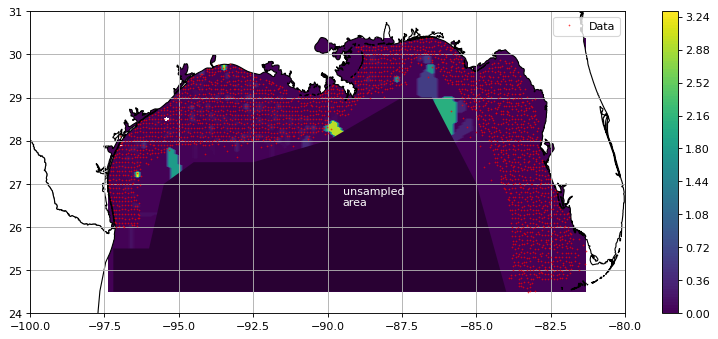

In [5]:

#sf = shp.Reader("WB_Coastlines_10m.shp")
with fiona.open("WB_countries_Admin0_10m.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

#print(type(Z_nearest))
#print(Z_nearest)

figure(figsize=(12, 5), dpi=80)
plt.contourf(X, Y, Z_nearest, 120)
plt.plot(Xi, Yi, "or", markersize=0.4, label = "Data")
plt.colorbar()
plt.legend()
plt.grid()
plt.xlim(-100,-80)
plt.ylim(24,31)
ax = mpl.pyplot.gca()
patches = [PolygonPatch(feature,  facecolor="white") for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
plt.fill([-84,-85, -86.5, -87.5, -90, -92.5, -94.5, -95.5, -96, -97.2, -97.2], 
         [24.5, 27, 29, 29, 28, 27.5, 27.5, 27, 25.5, 25.5, 24.5], '#290133')
plt.annotate("unsampled\narea", (-89.5, 26.5),color='white')
plt.show()


<ipython-input-6-31840077e6cc>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(12, 5), dpi=60)


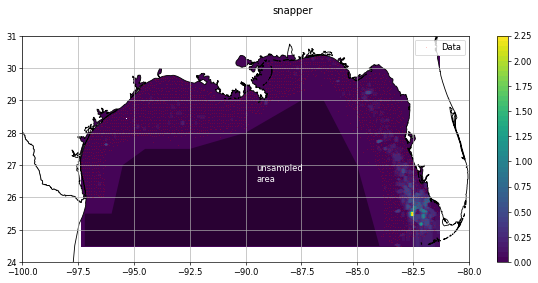

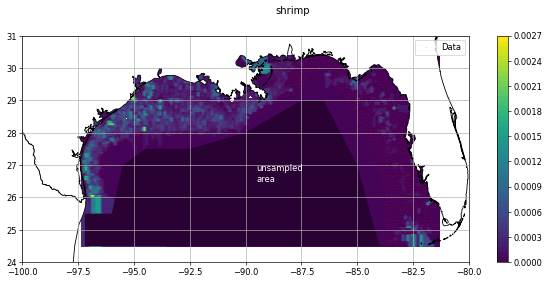

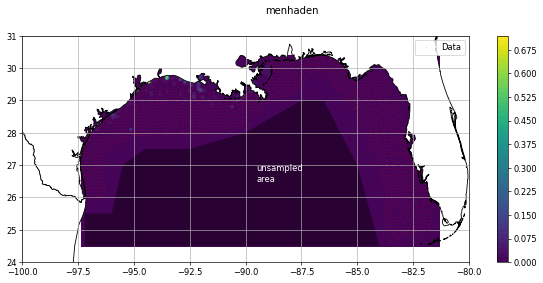

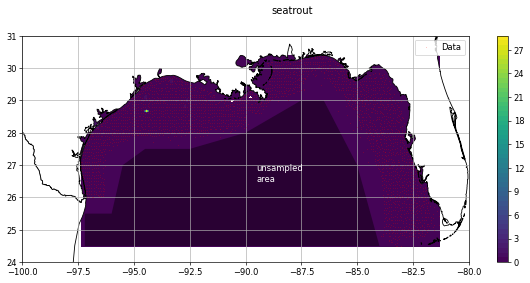

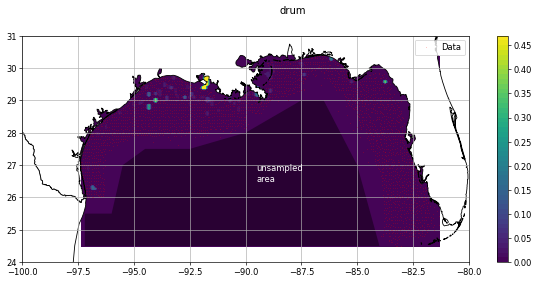

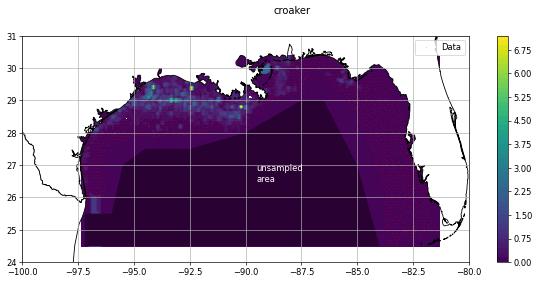

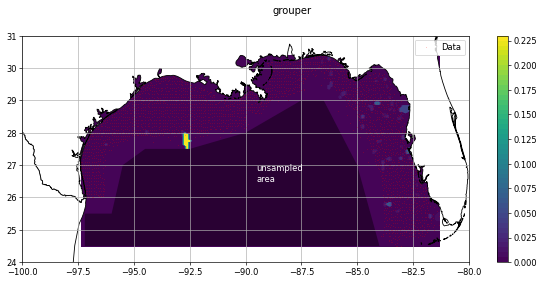

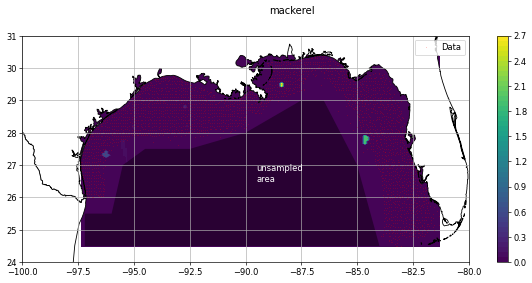

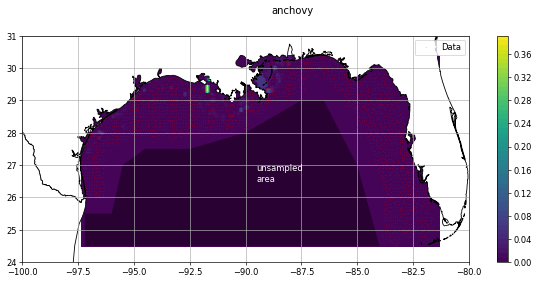

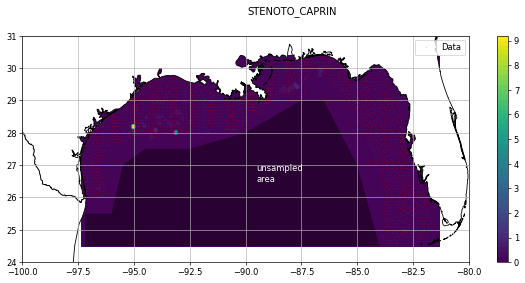

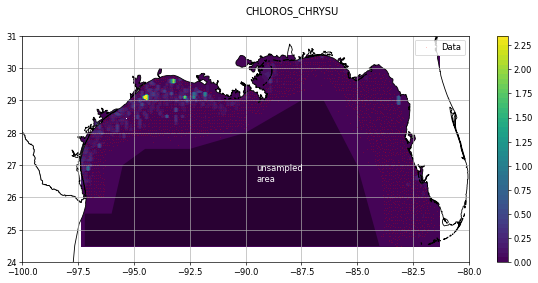

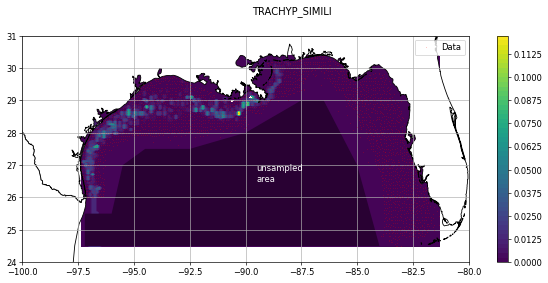

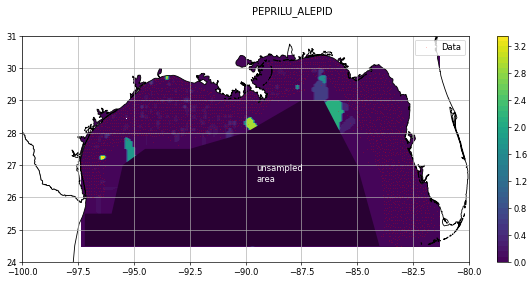

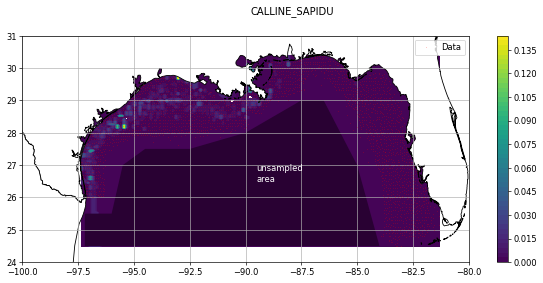

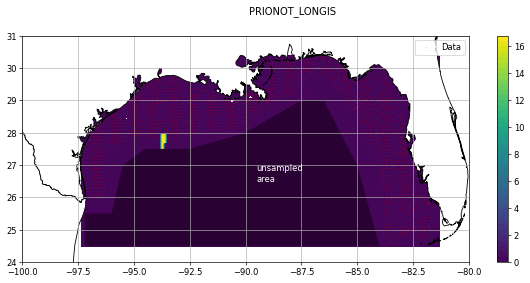

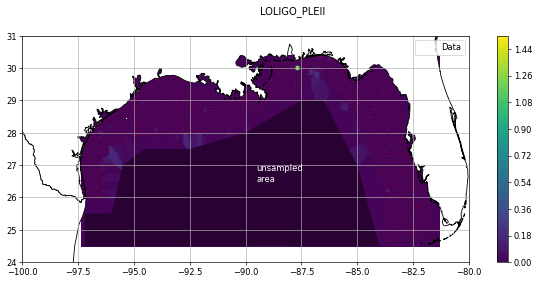

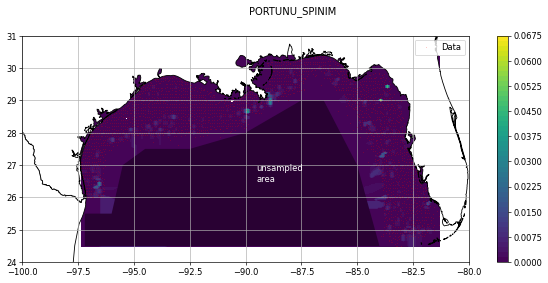

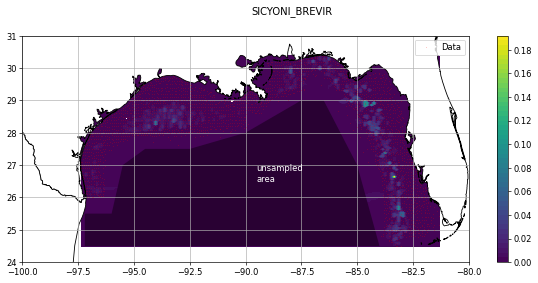

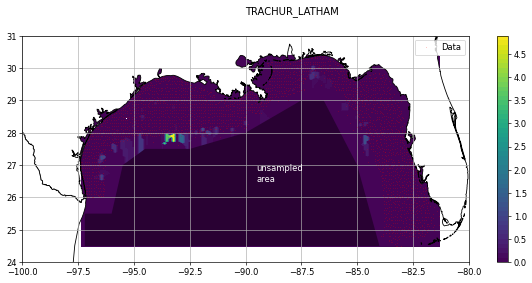

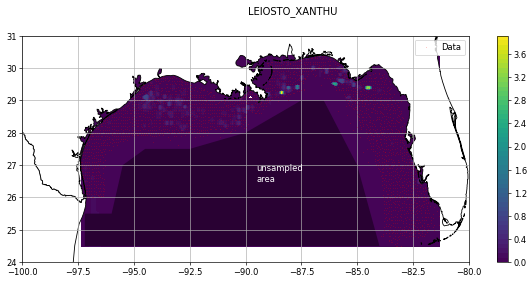

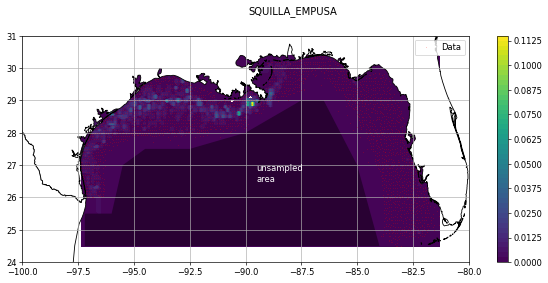

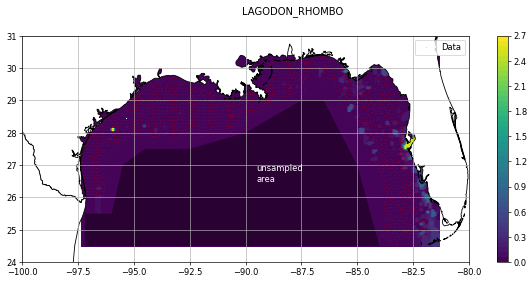

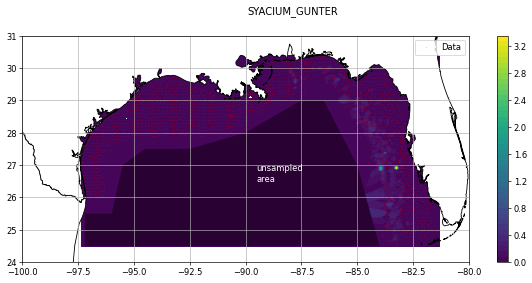

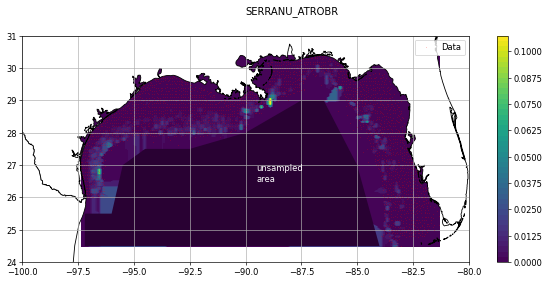

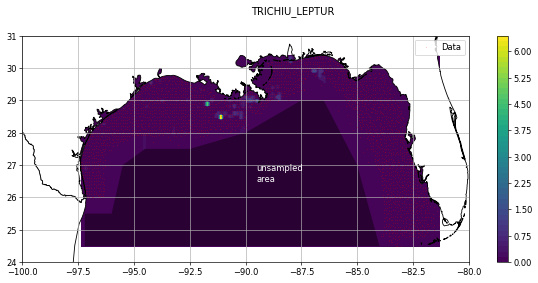

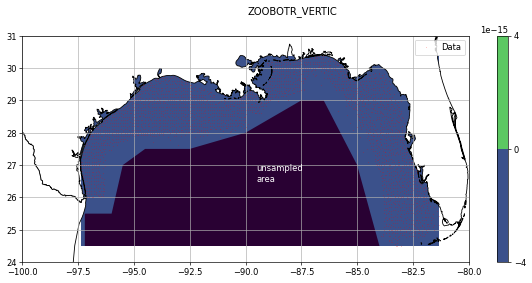

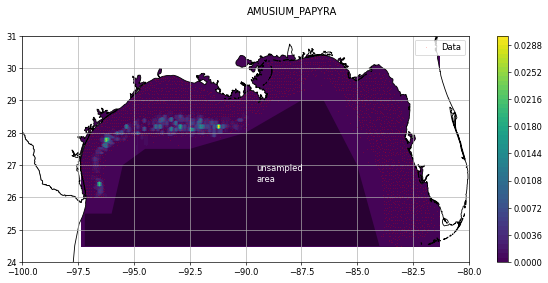

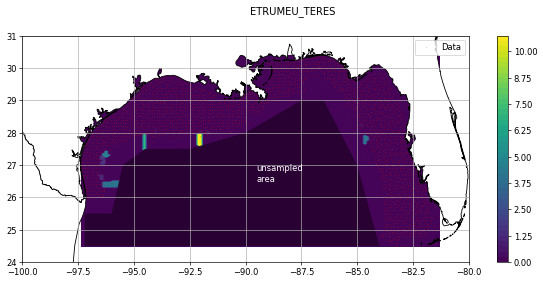

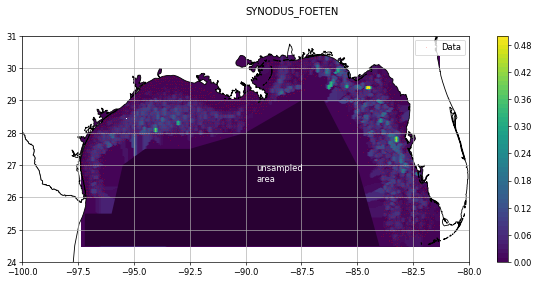

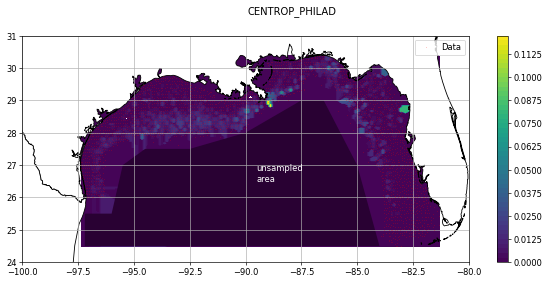

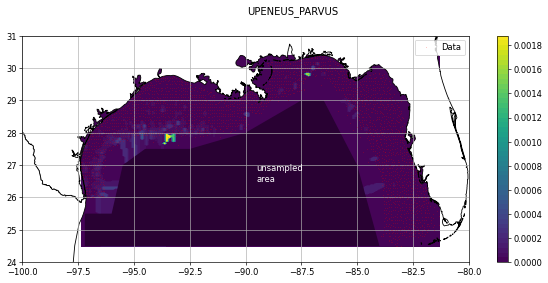

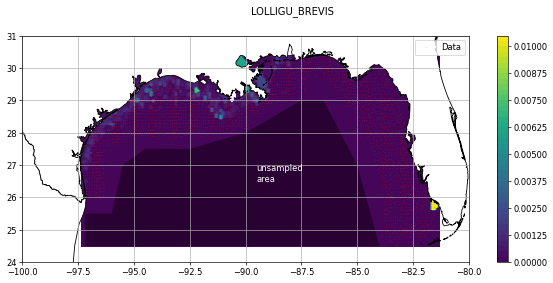

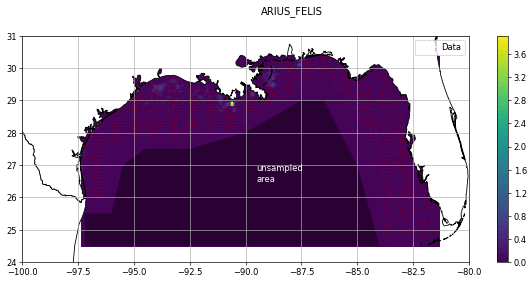

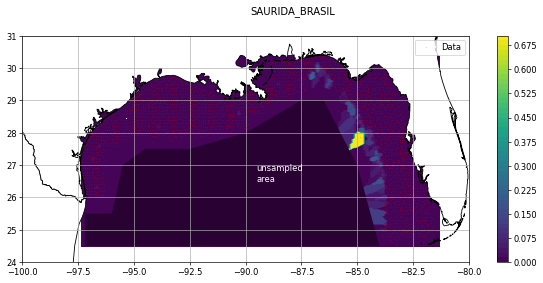

In [6]:
for k in list(genera.keys()):
    gen = genera[k]

    df = pd.read_csv("D:\public_seamap_csvs\\" + gen + "_CPUE.csv")
    df["lat_round"] = [round(i,1) for i in df['Lat'].tolist()]
    df["lon_round"] = [round(i,1) for i in df['Lon'].tolist()]
    # use pandas groupby to spatially average by lat and lon
    df = df.groupby(['lat_round', 'lon_round']).mean().reset_index()

    Xi = (-df['Lon']).tolist()
    Yi = df['Lat'].tolist()
    Zi = df['CPUE_MTSQKM'].tolist()


    Pi = np.array([Xi, Yi]).transpose()
    tri = Delaunay(Pi)

    N = 160
    x = np.linspace(min(Xi), max(Xi), N)
    y = np.linspace(min(Yi), max(Yi), N)
    X, Y = np.meshgrid(x, y)
    P = np.array([X.flatten(), Y.flatten() ]).transpose()

    Z_nearest = griddata(Pi, Zi, P, method = "nearest").reshape([N, N])

    #sf = shp.Reader("WB_Coastlines_10m.shp")
    with fiona.open("WB_countries_Admin0_10m.shp", "r") as shapefile:
        features = [feature["geometry"] for feature in shapefile]

    #print(type(Z_nearest))
    #print(Z_nearest)

    figure(figsize=(12, 5), dpi=60)
    plt.contourf(X, Y, Z_nearest, 50)
    plt.plot(Xi, Yi, "or", markersize=0.1, label = "Data")
    plt.colorbar()
    plt.legend()
    plt.grid()
    plt.xlim(-100,-80)
    plt.ylim(24,31)
    ax = mpl.pyplot.gca()
    patches = [PolygonPatch(feature,  facecolor="white") for feature in features]
    ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))

    plt.fill([-84,-85, -86.5, -87.5, -90, -92.5, -94.5, -95.5, -96, -97.2, -97.2], 
             [24.5, 27, 29, 29, 28, 27.5, 27.5, 27, 25.5, 25.5, 24.5], '#290133')
    
    plt.annotate("unsampled\narea", (-89.5, 26.5),color='white')
    
    plt.suptitle(k)

    #plt.savefig('Distribution_Images\\' + k + "_distribution_map.png",  dpi=80 )
    #plt.show()
    #plt.draw()
